In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random

N   = 1000
aux = frange(-1,1,0.001)
x   = np.random.choice(aux, N, replace = True)
y   = np.random.choice(aux, N, replace = True)
z   = np.random.choice(aux, N, replace = True)

# vx  = np.random.choice(aux, N, replace = True)
# vy  = np.random.choice(aux, N, replace = True)
# vz  = np.random.choice(aux, N, replace = True)

x = x*100
y = y*100
z = z*100

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<100)

x = x[mask]
y = y[mask]
z = z[mask]

# vx = vx*400 + 100
# vy = vy*400 + 100
# vz = vz*400 + 100

vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

vx = vx[mask]
vy = vy[mask]
vz = vz[mask]

(-150, 150)

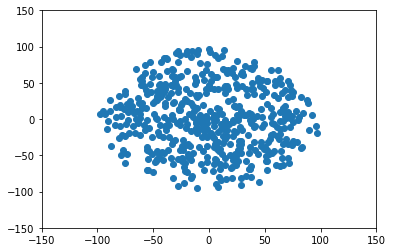

In [3]:
plt.plot(x,y,'o')
plt.xlim(-150,150)
plt.ylim(-150,150)

In [4]:
m = np.ones(len(x))*5e11
m = m/len(m)
print len(m)

513


In [5]:
pos = np.ndarray([len(m),3])
pos[:,0] = x
pos[:,1] = y
pos[:,2] = z

vel = np.ndarray([len(m),3])

vel[:,0] = vx
vel[:,1] = vy
vel[:,2] = vz

In [6]:
import distancias as d
eps = 0.5
G = 4.299e-6

dx,dy,dz,masas = d.distancias(x,y,z,m)
dist = np.sqrt(dx**2 + dy**2 + dz**2 + eps**2)

aux1 = np.sum(dx / dist**3,axis=0)
aux2 = np.sum(dy / dist**3,axis=0)
aux3 = np.sum(dz / dist**3,axis=0)

ax = G * m * aux1
ay = G * m * aux2
az = G * m * aux3

#print ax, ay, az

In [7]:
import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)
#print a

In [8]:
import runge
h = 0.01
nit = 100

k2 = np.ndarray([len(m),len(m)])
k3 = np.ndarray([len(m),len(m)])
k4 = np.ndarray([len(m),len(m)])
    
posf,velf,acf = runge.runge(eps,h,nit,m,pos,vel,acel,k2,k3,k4)

IndentationError: expected an indented block (runge.py, line 8)

NameError: name 'posf' is not defined

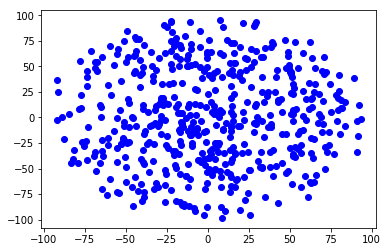

In [11]:
plt.plot(pos[:,0],pos[:,1],'o',color='b')
plt.plot(posf[:,0],posf[:,1],'o',color='r')